In [86]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [16, 9]

dir = 'BH_short_MPS_0.001_0.01_1.0'
dir = 'BH_short_MPS_0.001_0.01_2.0'
dir = 'BH_short_MPS_0.001_0.03_1.0'
dir = 'BH_short_MPS_0.001_0.03_2.0'
dir = 'BH_short_MPS_0.001_0.12_1.0'
dir = 'BH_short_MPS_0.001_0.12_2.0'
dir = 'BH_short_MPS_0.001_0.36_1.0'
dir = 'BH_short_MPS_0.001_0.36_2.0'

dir = 'BH_short_PEPS_0.001_0.01_1.0'
# dir = 'BH_short_PEPS_0.001_0.01_2.0'
# dir = 'BH_short_PEPS_0.001_0.03_1.0'
# dir = 'BH_short_PEPS_0.001_0.03_2.0'
# dir = 'BH_short_PEPS_0.001_0.12_1.0'
# dir = 'BH_short_PEPS_0.001_0.12_2.0'
# dir = 'BH_short_PEPS_0.001_0.36_1.0'
# dir = 'BH_short_PEPS_0.001_0.36_2.0'
#
dir = 'BH2_short_PEPS_5_9_0.01_1.0_0.001_20'
dir = 'BH2_short_PEPS_5_9_0.36_1.0_0.001_20'
dir = 'BH2_short_MPS_5_9_0.01_1.0_0.001_20'
dir = 'BH2_short_MPS_5_9_0.36_1.0_0.001_20'

dir = './BH_d=5_sud_28_7_1.0_4.9_0.001_500'

In [87]:
dim = 0
if 'MPS' in dir: dim = 1
else:
    if 'PEPS' in dir: dim = 2
    else: dim = 2

def polyfit(xxx,yyy,deg):
    # y = a*x^deg+b
    if False:
        xxx -= xxx[0]
        def p(x,a,b): return a*x**deg+b
        popt,pcov=curve_fit(p,xxx,yyy,[yyy[-1]/(xxx[-1]**deg),yyy[0]])
        # print(popt)
        ret = [0]*(deg+1)
        ret[0] = popt[0]
        ret[-1] = popt[-1]
        return ret
    else:
        xxx -= xxx[0]
        def p(x,a): return a*x**deg
        popt,pcov=curve_fit(p,xxx,yyy,[yyy[-1]/(xxx[-1]**deg)])
        # print(popt)
        ret = [0]*(deg+1)
        ret[0] = popt[0]
        return ret

In [88]:
try:
    SPECS = dict(np.load(dir + "/SPECS.npz"))
    for key in list(SPECS):
        SPECS[key] = SPECS[key].min()
    SPECS['n'] = 20
    print(SPECS)
    ts = []
    for i in range(SPECS['n']+1):
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        if 'tQ' in list(SPECS):
            ts.append(PEPS['iter'] * PEPS['dt'] - PEPS['tQ'])
        else:
            ts.append(PEPS['iter'] * PEPS['dt'])
except: pass

{'INVprecision': 1e-10, 'NTUprecision': 1e-15, 'CTMRGprecision': 1e-12, 'maxiter': 100, 'n': 20, 'dt': 0.001, 'd': 3, 'D': 7, 'r': 9, 'chi': 28, 'J': 1.0, 'U': 4.9}


In [89]:
CTMerror = []
for i in range(SPECS['n']+1):
    # print(i)
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    CTMerror.append(ENV['error'])
CTMerror

[array(0.),
 array(6.47722574e-16),
 array(1.46577981e-15),
 array(8.16068267e-16),
 array(4.80877565e-15),
 array(1.03277155e-14),
 array(2.52384442e-14),
 array(6.63190106e-14),
 array(1.00794893e-15),
 array(2.16932215e-15),
 array(1.73632146e-15),
 array(6.95112904e-15),
 array(9.12611123e-15),
 array(1.1112986e-14),
 array(1.96912568e-14),
 array(3.87711051e-14),
 array(6.23983109e-14),
 array(6.09558945e-14),
 array(1.042333e-15),
 array(9.32871969e-16),
 array(1.13883579e-15)]

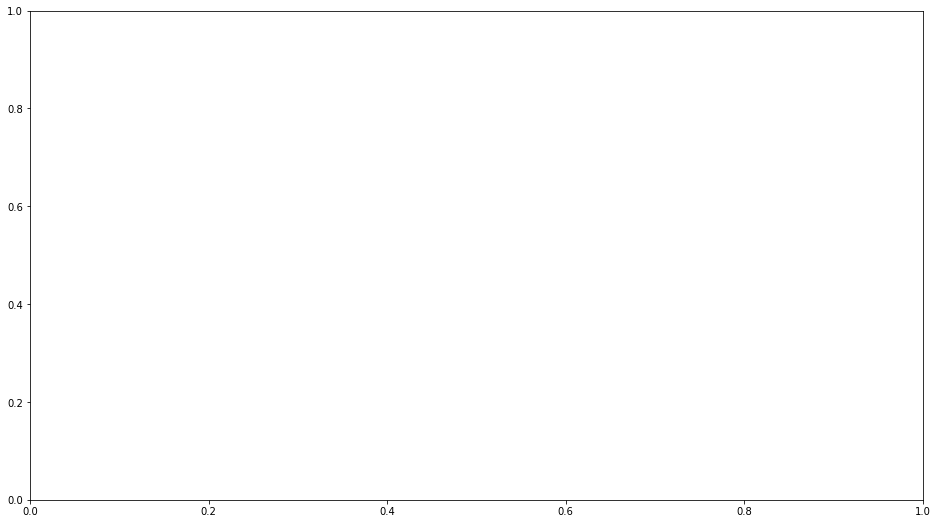

In [90]:
try:
    Js = []
    for i in range(SPECS['n']):
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        Js.append(PEPS['J'])

    plt.clf()
    plt.plot(ts, Js)
    plt.show()
except:
    pass

A2 = 32.02200085471104
J^2 = 1.0
A2 / J^2 = 32.02200085471104


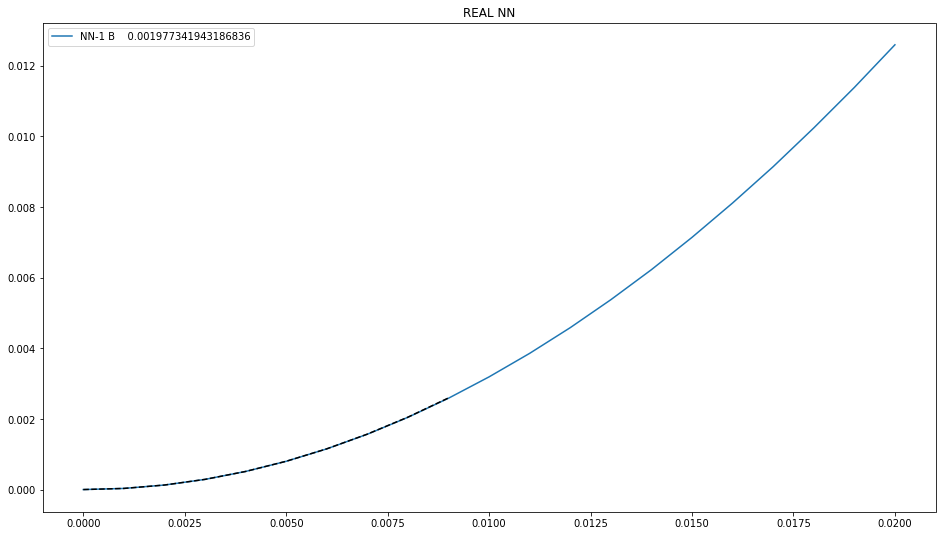

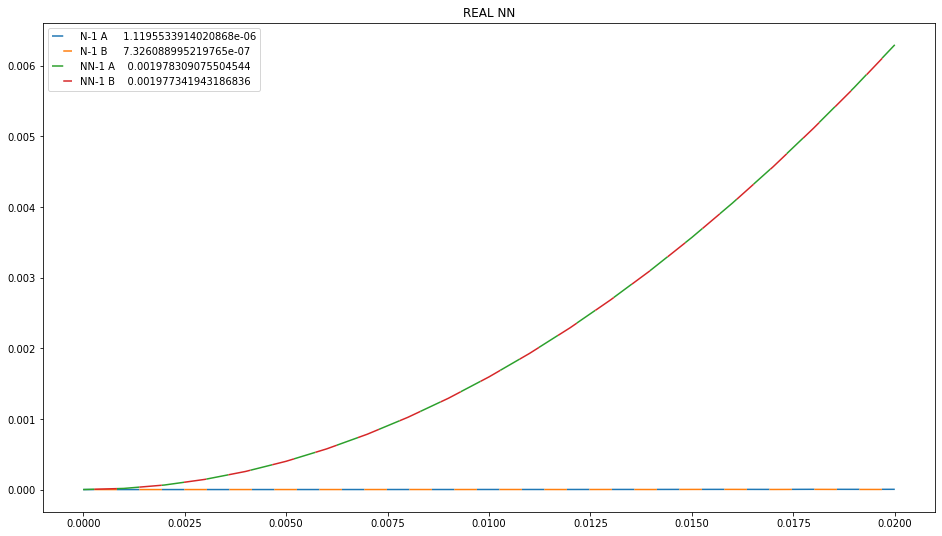

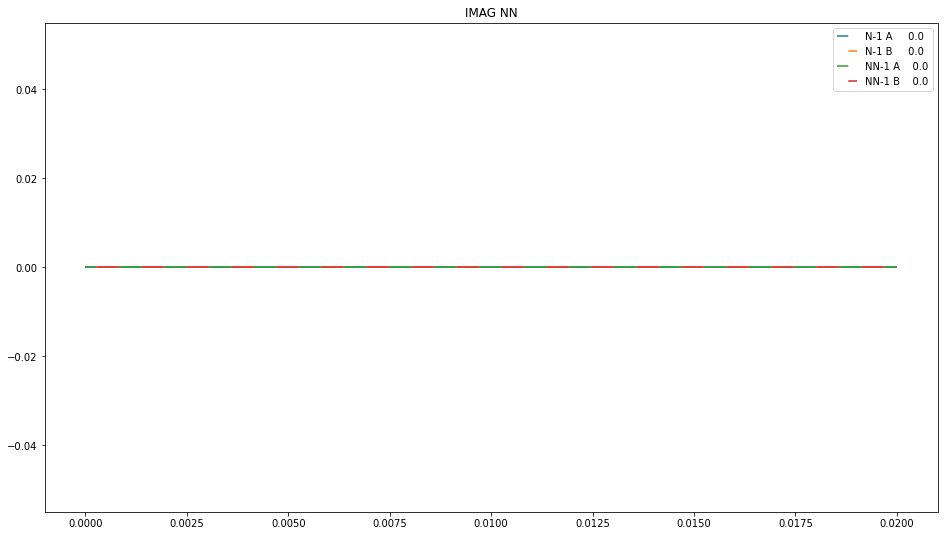

In [91]:
if not 'J' in SPECS:
    SPECS['J'] = float(dir.split('_')[-2])
if not 'U' in SPECS:
    SPECS['U'] = float(dir.split('_')[-1])

nA, nB, nnA, nnB = [], [], [], []
for i in range(SPECS['n']+1):
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    nA.append(np.trace(ENV['rhoA'] @ np.diag([x for x in range(SPECS['d'])])))
    nB.append(np.trace(ENV['rhoB'] @ np.diag([x for x in range(SPECS['d'])])))
    nnA.append(np.trace(ENV['rhoA'] @ np.diag([x**2 for x in range(SPECS['d'])])))
    nnB.append(np.trace(ENV['rhoB'] @ np.diag([x**2 for x in range(SPECS['d'])])))

nA = np.array(nA)
nB = np.array(nB)
nnA = np.array(nnA)
nnB = np.array(nnB)

maxind = 5

ps = polyfit(ts[:maxind],(((nnA-nnA[0])+(nnB-nnB[0])).real)[:maxind],2)
print("A2 =",ps[0])
print("J^2 =",SPECS['J']**2)
print("A2 / J^2 =",ps[0]/(SPECS['J']**2))
ANNpJJ = ps[0]/(SPECS['J']**2)

plt.clf()
plt.title("REAL NN")
# plt.ylim(-1e-9,5e-9)
plt.plot(ts, nnB.real-nnB.real[0] + nnA.real-nnA.real[0], label='NN-1 B    ' + str(np.std(nnB.real)))
plt.plot(ts[:maxind*2],np.poly1d(ps)(np.array(ts[:maxind*2])),'--',color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("REAL NN")
# plt.ylim(-1e-9,5e-9)
plt.plot(ts, nA.real-nA.real[0], label='N-1 A     ' + str(np.std(nA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.real-nB.real[0], label='N-1 B     ' + str(np.std(nB.real)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.real-nnA.real[0], label='NN-1 A    ' + str(np.std(nnA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.real-nnB.real[0], label='NN-1 B    ' + str(np.std(nnB.real)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG NN")
plt.plot(ts, nA.imag, label='N-1 A     ' + str(np.std(nA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.imag, label='N-1 B     ' + str(np.std(nB.imag)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.imag, label='NN-1 A    ' + str(np.std(nnA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.imag, label='NN-1 B    ' + str(np.std(nnB.imag)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

A2 = 313.41226276754105
JU = 4.9
A2 / JU = 63.96168627909


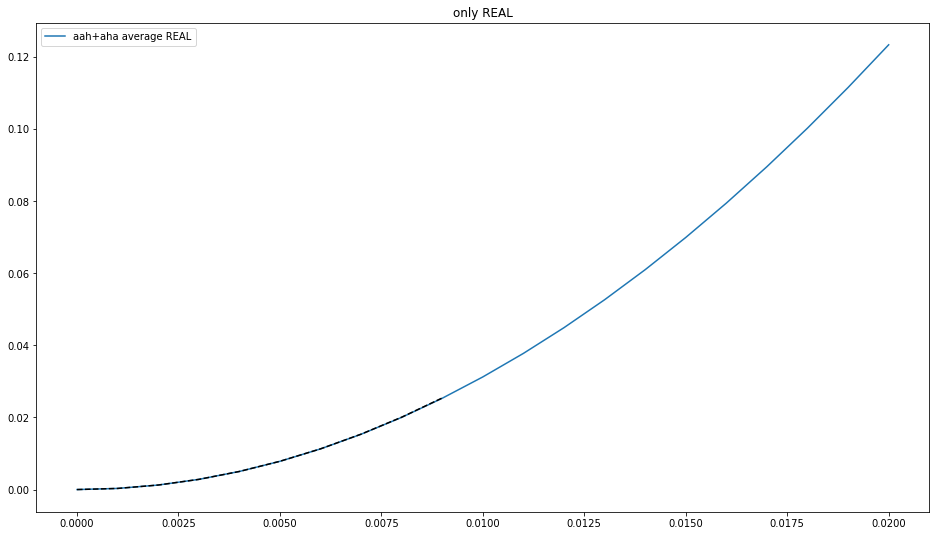

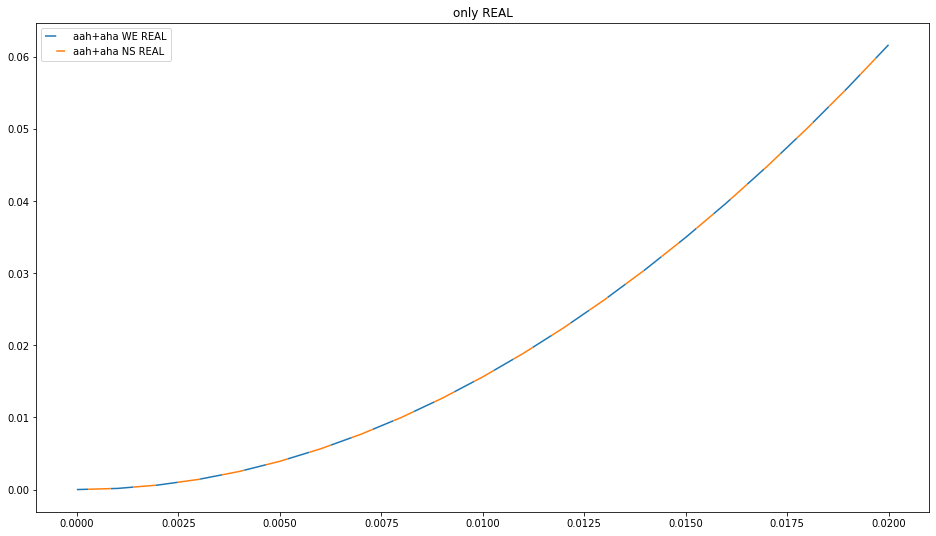

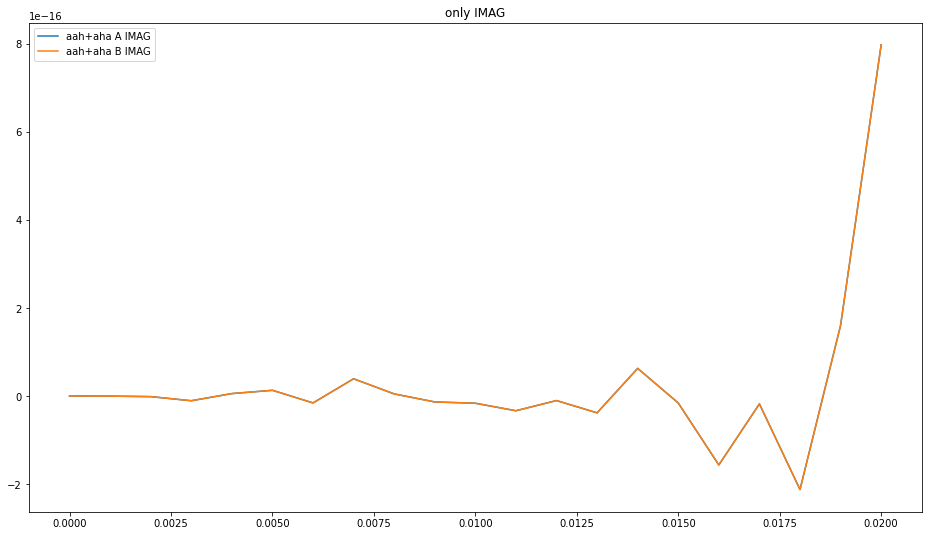

In [92]:
arA, arB = [], []
dist = 1

E_AB_WE_aah, E_AB_NS_aah = [], []
E_BA_WE_aah, E_BA_NS_aah = [], []
E_AB_WE_aha, E_AB_NS_aha = [], []
E_BA_WE_aha, E_BA_NS_aha = [], []

for i in range(SPECS['n']+1):
    try:
        corrAAH_WE = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA_WE = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))
        corrAAH_NS = dict(np.load(dir + "/CORR_AAH_NS_{:05d}.npz".format(i)))
        corrAHA_NS = dict(np.load(dir + "/CORR_AHA_NS_{:05d}.npz".format(i)))

        E_AB_WE_aha.append(corrAHA_WE['corA'][dist])
        E_AB_WE_aah.append(corrAAH_WE['corA'][dist])
        E_BA_WE_aha.append(corrAHA_WE['corB'][dist])
        E_BA_WE_aah.append(corrAAH_WE['corB'][dist])
        E_AB_NS_aha.append(corrAHA_NS['corA'][dist])
        E_AB_NS_aah.append(corrAAH_NS['corA'][dist])
        E_BA_NS_aha.append(corrAHA_NS['corB'][dist])
        E_BA_NS_aah.append(corrAAH_NS['corB'][dist])
    except:
        print(i)
        break

E_AB_WE_aha = np.array(E_AB_WE_aha)
E_AB_WE_aah = np.array(E_AB_WE_aah)
E_BA_WE_aha = np.array(E_BA_WE_aha)
E_BA_WE_aah = np.array(E_BA_WE_aah)
E_AB_NS_aha = np.array(E_AB_NS_aha)
E_AB_NS_aah = np.array(E_AB_NS_aah)
E_BA_NS_aha = np.array(E_BA_NS_aha)
E_BA_NS_aah = np.array(E_BA_NS_aah)

maxind = 5
average = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah)
if 'J' in SPECS:
    ps = polyfit(ts[:maxind],(average.real)[:maxind],2)
    print("A2 =",ps[0])
    print("JU =",SPECS['J']*SPECS['U'])
    print("A2 / JU =",ps[0]/(SPECS['J']*SPECS['U']))
    AAApJU = ps[0]/(SPECS['J']*SPECS['U'])
else:
    ps = polyfit(ts[:maxind],(average.real)[:maxind],4)
    print("A4 =",ps[0])
    print(ps)
    print("Jc*U/tQ^2 = ",SPECS['J_crit']*1/SPECS['tQ']**2)
    print("missing part =",ps[0]/(SPECS['J_crit']*1/SPECS['tQ']**2))

plt.clf()
plt.title("only REAL")
plt.plot(ts, (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real, label='aah+aha average REAL')
plt.plot(ts[:maxind*2],np.poly1d(ps)(np.array(ts[:maxind*2])),'--',color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("only REAL")
plt.plot(ts, (E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real, label='aah+aha WE REAL', linestyle=(7.5, (15, 15)))
plt.plot(ts, (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah).real, label='aah+aha NS REAL', linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

plt.clf()
plt.title("only IMAG")
plt.plot(ts, (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha A IMAG')
plt.plot(ts, (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha B IMAG')
plt.legend()
plt.show()

A2 = -15.94160641568361
JU = 1.0
A2 / JU = -15.94160641568361


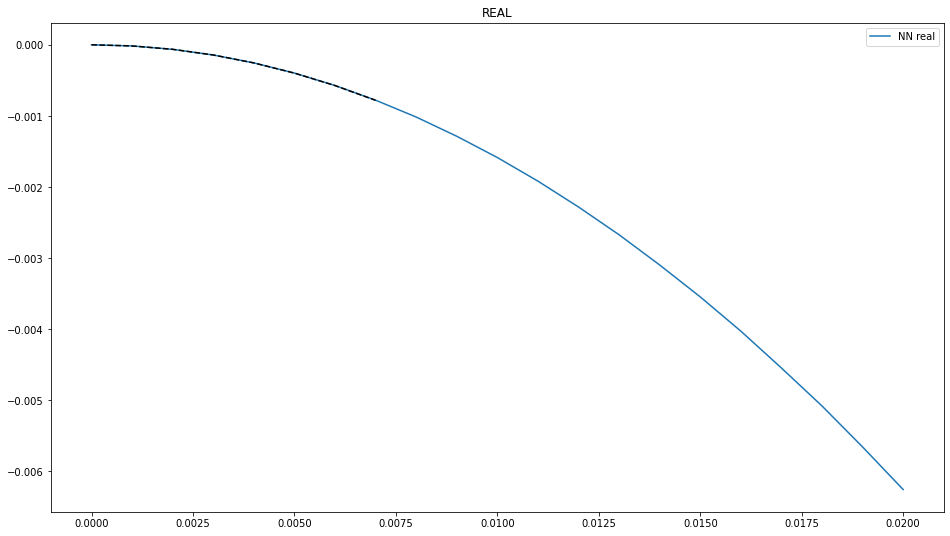

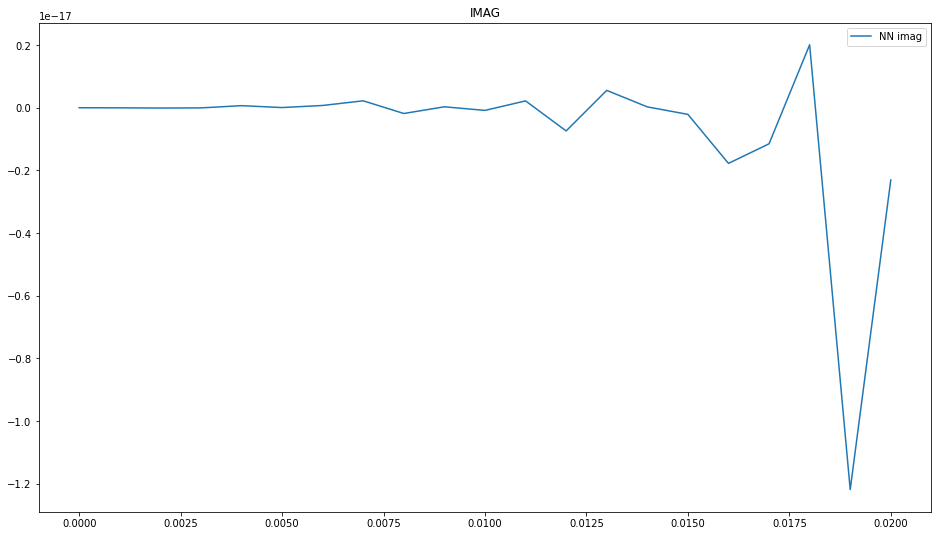

In [93]:
arA, arB = [], []
dist = 1

E_AB_WE_NN, E_BA_WE_NN, E_AB_NS_NN, E_BA_NS_NN = [], [], [], []

for i in range(SPECS['n']+1):
    try:
        corrNN_WE = dict(np.load(dir + "/CORR_NN_WE_{:05d}.npz".format(i)))
        corrNN_NS = dict(np.load(dir + "/CORR_NN_NS_{:05d}.npz".format(i)))

        E_AB_WE_NN.append(corrNN_WE['corA'][dist])
        E_BA_WE_NN.append(corrNN_WE['corB'][dist])
        E_AB_NS_NN.append(corrNN_NS['corA'][dist])
        E_BA_NS_NN.append(corrNN_NS['corB'][dist])
    except:
        print(i)
        break

E_AB_WE_NN = np.array(E_AB_WE_NN) - E_AB_WE_NN[0]
E_BA_WE_NN = np.array(E_BA_WE_NN) - E_BA_WE_NN[0]
E_AB_NS_NN = np.array(E_AB_NS_NN) - E_AB_NS_NN[0]
E_BA_NS_NN = np.array(E_BA_NS_NN) - E_BA_NS_NN[0]
average = E_AB_WE_NN+E_BA_WE_NN+E_AB_NS_NN+E_BA_NS_NN

maxind = 4
ps = polyfit(ts[:maxind],(average.real)[:maxind],2)
print("A2 =",ps[0])
print("JU =",SPECS['J']**2)
print("A2 / JU =",ps[0]/(SPECS['J']**2))
ANNspJJ = ps[0]/(SPECS['J']**2)

plt.clf()
plt.title("REAL")
plt.plot(ts, average, label='NN real')
plt.plot(ts[:2*maxind],np.poly1d(ps)(np.array(ts[:maxind*2])),'--',color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG")
plt.plot(ts, average.imag, label='NN imag')
plt.legend()
plt.show()

In [94]:
print(dir.split('_'))
print(1 if 'BH'==dir.split('_')[0] else 2)
print(dir.split('_')[2])
print("⟨VarN⟩ =",np.round(ANNpJJ,4),"* JJ t^2")
print("⟨NN⟩ =",np.round(ANNspJJ,4),"* JJ t^2")
print("⟨AA⟩ =",np.round(AAApJU,4),"* JU t^2")
mess = ""
mess += ("1" if 'BH'==dir.split('_')[0] else "2")+"\t"
mess += ("1" if 'MPS'==dir.split('_')[2] else "2")+"\t"
mess += str(np.round(ANNpJJ,4))+"\t"
mess += str(np.round(AAApJU,4))+"\t"
mess += str(np.round(ANNspJJ,4))+"\t"+dir+"\n"
f = open('buff.txt','a+')
f.write(mess)
f.close()

['./BH', 'd=5', 'sud', '28', '7', '1.0', '4.9', '0.001', '500']
2
sud
⟨VarN⟩ = 32.022 * JJ t^2
⟨NN⟩ = -15.9416 * JJ t^2
⟨AA⟩ = 63.9617 * JU t^2


In [95]:
1/0

ZeroDivisionError: division by zero

In [ ]:
a1=E_AB_WE_aha+E_AB_WE_aah
a2=E_AB_NS_aha+E_AB_NS_aah
a3=E_BA_WE_aha+E_BA_WE_aah
a4=E_BA_NS_aha+E_BA_NS_aah

for l in [a1,a2,a3,a4]:
    print(np.std(np.abs(l.imag)))

In [ ]:
a1=a1.real
a2=a2.real
a3=a3.real
a4=a4.real
for l in [a1,a2,a3,a4]:
    plt.plot(ts,l,linestyle=(7.5, (15, 15)))
    plt.show()

In [ ]:
a=a1/2+a3/2

In [ ]:
f = a[1:]/ts[1:]/ts[1:]
print(np.mean(f))
print(np.std(f))

In [ ]:
ps

In [ ]:
from ncon import ncon
E_AB_aah_1, E_AB_aha_1, E_BA_aah_1, E_BA_aha_1 = [], [], [], []

for i in range(SPECS['n']+1):
    PEPS=dict(np.load(dir+"/PEPS_{:05d}.npz".format(i)))
    env=dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))

    A = PEPS['A']
    B = PEPS['B']
    a = np.diag(np.sqrt(np.arange(1, PEPS['A'].shape[-1])), k=1)
    ah = a.T

    cons = ([-1, -2, -3, -4, 1], [-5, 1])
    Aa = ncon([A, a], cons)
    Bah = ncon([B, ah], cons)
    Aah = ncon([A, ah], cons)
    Ba = ncon([B, a], cons)
    Ac = A.conj()
    Bc = B.conj()

    cons1 = ([2, 11], [11, 19, 9, 10], [19, 24, 17, 18], [24, 25], [25, 21, 22, 23], [21, 20], [20, 12, 13, 14],
             [12, 3, 4, 6], [3, 1], [1, 2, 5, 7], [4, 15, 9, 5, 8], [6, 16, 10, 7, 8], [13, 22, 17, 15, 26],
             [14, 23, 18, 16, 26])
    E_AB_aah_1.append(ncon(
        [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
         env['E_N_B'], env['C_NW_A'], env['E_W_B'], Aa, Ac, Bah, Bc],
        cons1) / ncon(
        [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
         env['E_N_B'], env['C_NW_A'], env['E_W_B'], A, Ac, B, Bc],
        cons1))
    E_AB_aha_1.append(ncon(
        [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
         env['E_N_B'], env['C_NW_A'], env['E_W_B'], Aah, Ac, Ba, Bc],
        cons1) / ncon(
        [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
         env['E_N_B'], env['C_NW_A'], env['E_W_B'], A, Ac, B, Bc],
        cons1))
    E_BA_aah_1.append(ncon(
        [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
         env['E_N_A'], env['C_NW_B'], env['E_W_A'], Ba, Bc, Aah, Ac],
        cons1) / ncon(
        [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
         env['E_N_A'], env['C_NW_B'], env['E_W_A'], B, Bc, A, Ac],
        cons1))
    E_BA_aha_1.append(ncon(
        [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
         env['E_N_A'], env['C_NW_B'], env['E_W_A'], Bah, Bc, Aa, Ac],
        cons1) / ncon(
        [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
         env['E_N_A'], env['C_NW_B'], env['E_W_A'], B, Bc, A, Ac],
        cons1))
    clear_output(True)
    print(i,"/",SPECS['n'])

In [ ]:
a1=np.array(E_AB_aha_1)+np.array(E_AB_aah_1)
a2=np.array(E_BA_aha_1)+np.array(E_BA_aah_1)

for l in [a1,a2]:
    print(np.std(np.abs(l.imag)))

a1=a1.real
a2=a2.real
for l in [a1,a2]:
    plt.plot(ts,l[:-1],linestyle=(7.5, (15, 15)))
    plt.show()